# Multiple Linear Regression

### Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

### Import the Dataset

In [20]:
dataset = pd.read_csv(r'C:\Users\moshe\Documents\Mechine Learning\Multiple_Linear_Regression\50_Startups.csv')

In [21]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
dataset.shape

(50, 5)

In [23]:
X = dataset.iloc[:, :-1].values

In [24]:
y = dataset.iloc[:, -1].values

In [25]:
X[0:5]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [26]:
y[0:5]

array([ 192261.83,  191792.06,  191050.39,  182901.99,  166187.94])

### Encoding the Catagorical Data

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [28]:
labelencoder_X = LabelEncoder()

In [29]:
X[:,3] = labelencoder_X.fit_transform(X[:, 3])

In [31]:
onehotencoder = OneHotEncoder(categorical_features=[3])

In [33]:
X = onehotencoder.fit_transform(X).toarray()

In [34]:
X[0:5]

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+05,   1.18671850e+05,   3.83199620e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+05,   9.13917700e+04,   3.66168420e+05]])

#### To avoid dummy variable trap (not nessary with this library but good to make sure)

In [35]:
X = X[:, 1:]

In [36]:
X[0:5]

array([[  0.00000000e+00,   1.00000000e+00,   1.65349200e+05,
          1.36897800e+05,   4.71784100e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.62597700e+05,
          1.51377590e+05,   4.43898530e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.53441510e+05,
          1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.44372410e+05,
          1.18671850e+05,   3.83199620e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.42107340e+05,
          9.13917700e+04,   3.66168420e+05]])

### Splitting the dataset into the Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
print('The length of the training set in x is: %r' % len(X_train))
print('The length of the test set in x is: %r' % len(X_test))
print('The length of the training set in y is: %r' % len(y_train))
print('The length of the test set in y is: %r' % len(y_test))

The length of the training set in x is: 40
The length of the test set in x is: 10
The length of the training set in y is: 40
The length of the test set in y is: 10


### Fitting Muttiple Linear Regression Model to the Training set

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
regressor = LinearRegression()

In [43]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting the Test set results

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
print(y_test[0:3])
print(y_pred[0:3])

[ 155752.6    35673.41  156991.12]
[ 159412.97850347   51664.89060714  165772.91032671]


# Visualize Real vs. Predicted Values

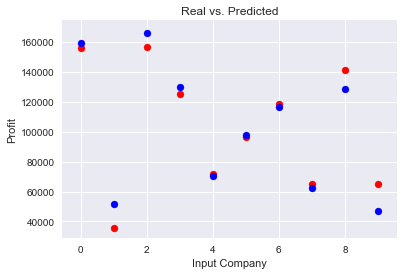

In [47]:
plt.scatter(np.arange(0, len(X_test)), y_test, color='red');
plt.scatter(np.arange(0, len(X_test)), y_pred, color='blue');
plt.title('Real vs. Predicted');
plt.xlabel('Input Company');
plt.ylabel('Profit');
plt.show()

## Use Backward Elimination to build a more Optimal Model

In [48]:
import statsmodels.formula.api as sm

#### append list of 1s to front of data, to capture the x0 info

In [49]:
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

In [50]:
X[0:5]

array([[  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+05,   1.18671850e+05,   3.83199620e+05],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+05,   9.13917700e+04,   3.66168420e+05]])

In [51]:
X_opt = X[:, [0,1,2,3,4,5]]

In [53]:
regressor_ols = sm.OLS(endog= y, exog = X_opt).fit()

In [54]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           1.34e-27
Time:                        22:17:33   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000      3.62e+04   6.4e+04
x1           198.7888   3371.007      0.059      0.953     -6595.030  6992.607
x2           -41.8870   3256.039     -0.013      0.990     -6604.003  6520.229
x3             0.8060      0.046     17.369      0.000         0.712     0.900
x4            -0.0270      0.052     -0.517      0.608        -0.132     0.078
x5             0.0270      0.017      1.574      0.123        -0.008     0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now start removing varibles with high p-values

In [55]:
X_opt = X[:, [0,1,3,4,5]]

In [56]:
regressor_ols = sm.OLS(endog= y, exog = X_opt).fit()

In [57]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           8.49e-29
Time:                        22:20:04   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000      3.67e+04  6.35e+04
x1           220.1585   2900.536      0.076      0.940     -5621.821  6062.138
x2             0.8060      0.046     17.606      0.000         0.714     0.898
x3            -0.0270      0.052     -0.523      0.604        -0.131     0.077
x4             0.0270      0.017      1.592      0.118        -0.007     0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
X_opt = X[:, [0,3,4,5]]

In [59]:
regressor_ols = sm.OLS(endog= y, exog = X_opt).fit()

In [60]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           4.53e-30
Time:                        22:22:36   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000      3.69e+04  6.34e+04
x1             0.8057      0.045     17.846      0.000         0.715     0.897
x2            -0.0268      0.051     -0.526      0.602        -0.130     0.076
x3             0.0272      0.016      1.655      0.105        -0.006     0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
X_opt = X[:, [0,3,5]]

In [62]:
regressor_ols = sm.OLS(endog= y, exog = X_opt).fit()

In [63]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           2.16e-31
Time:                        22:23:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000      4.16e+04  5.24e+04
x1             0.7966      0.041     19.266      0.000         0.713     0.880
x2             0.0299      0.016      1.927      0.060        -0.001     0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""